<div class="alert alert-block alert-info">

    
# Material for a class Using Python Data on: Formation channels of Gravitational Waves (GWs)
    
In this jupyter notebook we will walk through and re-create some of the figures from https://arxiv.org/pdf/2112.05763 .  Specifically we will be recreating Figure 1, and once we have done that we can go into the specific projects  <br>



Notebook by Floor Broekgaarden<br>
<br>

The original data can be found on Zenodo:<br>
    For BBHs:  download COMPASCompactOutput_BBH_A.h5 from the `fiducial` folder on https://zenodo.org/records/5651073 <br>
    And For BNS:  download COMPASCompactOutput_BNS_A.h5 from the `fiducial` folder on https://zenodo.org/records/5189849 <br> 

For this tutorial we have downloaded these files from the zenodo, I provide the example for the BHNS file. You will have to change this to work for your file (BNS or BBH):

___




In [1]:
# reading in some basic parameters

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import h5py as h5
import numpy as np
import matplotlib.pyplot as plt




<div class="alert alert-block alert-warning">

Throughout this notebook and in class we will use several acronyms and definitions listed below    
    
    
    
### Definitions: 
    
    
 - BBH: Binary Black Hole 
 - BNS: Binary Neutron Star 
 - GW: Gravitational Waves 
 - DCO: Double Compact Object 
 - BH: Black Hole
 - NS: Neutron Star
 - Primary: in this notebook always refers to the star that was most massive at the zero age main sequence (ZAMS)
 - Secondary: in this notebook always refers to the star that was least massive at the zero age main sequence (ZAMS)
 - ZAMS: Zero Age Main Sequence: this is in COMPAS where stars start their lives. 
    

In [2]:
## Change this line to read in the relevant data ###
path  = '/Volumes/SimonsFoundation/DataDCO/fiducial/COMPASCompactOutput_BHNS_A.h5'


In [3]:
# some set up

metallicityGrid =[0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
               0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
               0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
               0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
               0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
               0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
               0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
               0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]




In [4]:







def calculate_formation_efficiencies(path = '/Volumes/SimonsFoundation/DataDCO/fiducial/COMPASCompactOutput_BHNS_A.h5', metallicityGrid=[0.001]):


        fdata = h5.File(path, 'r')
        fDCO  = fdata['doubleCompactObjects']
        
        # some of the parameters that the data stores
        metallicitySystems  = fDCO['Metallicity1'][...].squeeze()
        delayTimes          = fDCO['tform'][...].squeeze() + \
                                   fDCO['tc'][...].squeeze() # delay time in Myr of the systems
        tc                  = fDCO['tc'][...].squeeze() # coalescence time in Myr
        mass1               = fDCO['M1'][...].squeeze() # mass of the primary compact object (initially most massive star)
        mass2               = fDCO['M2'][...].squeeze() # mass of the secondary compact object (initially least massive star)
        weights              = fDCO['weight'][...].squeeze() # weight of this sample ("probability")
        m1zams              = fDCO['M1ZAMS'][...].squeeze() # initial mass of the primary at ZAMS 
        m2zams              = fDCO['M2ZAMS'][...].squeeze() # initial mass of the secondary at ZAMS 
        separationzams      = fDCO['separationInitial'][...].squeeze() # initial separation of the system at ZAMS 
        
        unique_metallicities_simulation = np.unique(metallicitySystems)


        meanMassEvolved = 77708655 # average mass that a simulation represents at a single metallicity


        formation_efficiency           = np.zeros(len(metallicityGrid))  


        # loop over the simulated metallicities
        for nrZ, Z in enumerate(metallicityGrid): 
            if Z in unique_metallicities_simulation:
                maskZ = (metallicitySystems == Z) # get all the systems that have this specific metallicity
                formation_efficiency[nrZ] = (np.sum(weights[maskZ]))/meanMassEvolved  # //floor weights because not every binary in COMPAS is equally represented in the galaxy 
        
        # this returns the formation efficiency in units per solar mass [Msun^-1]
        return formation_efficiency





<div class="alert alert-block alert-warning">

    
## Example 0: playing around with the BHNS data 
___
below we show an example of how to obtain and plot the efficiencies 



In [5]:
fdata = h5.File(path, 'r')
fDCO  = fdata['doubleCompactObjects']

# some of  the parameters that the data stores
metallicitySystems  = fDCO['Metallicity1'][...].squeeze()
delayTimes          = fDCO['tform'][...].squeeze() + \
                           fDCO['tc'][...].squeeze() # delay time in Myr of the systems
tc                  = fDCO['tc'][...].squeeze() # coalescence time in Myr
mass1               = fDCO['M1'][...].squeeze() # mass of the primary compact object (initially most massive star)
mass2               = fDCO['M2'][...].squeeze() # mass of the secondary compact object (initially least massive star)
weights              = fDCO['weight'][...].squeeze() # weight of this sample ("probability")
m1zams              = fDCO['M1ZAMS'][...].squeeze() # initial mass of the primary at ZAMS 
m2zams              = fDCO['M2ZAMS'][...].squeeze() # initial mass of the secondary at ZAMS 
separationzams      = fDCO['separationInitial'][...].squeeze() # initial separation of the system at ZAMS 

In [6]:
print(fDCO.keys())

print((metallicitySystems[0]))
print(m1zams[0])
print(m2zams[0])
print((mass1[0]))
print((mass2[0]))

<KeysViewHDF5 ['M1', 'M1ZAMS', 'M2', 'M2ZAMS', 'Metallicity1', 'doubleCommonEnvelopeFlag', 'eccentricityDCOFormation', 'formaton channel', 'mergesInHubbleTimeFlag', 'optimisticCEFlag', 'seed', 'separationDCOFormation', 'separationInitial', 'stellarType1', 'stellarType2', 'tc', 'tform', 'weight']>
0.0001
20.8461
16.9277
3.93168
1.27758


[ 3.93168 13.4491   2.20032 ...  4.06103  4.023    3.73859]

[31.4423 26.3835 26.4491 28.9154 31.3155 30.8416 31.6823 27.5023 34.0008
 36.3193 26.2425 36.9272 36.2825 25.2481 29.334  27.0376 28.4384 25.9026
 25.202  27.1978 27.4471 29.7412 35.538  30.8256 27.1162 33.9881 26.5984
 37.3449 27.9851 26.5063 27.9236 30.2821 25.218  33.0383 25.6897 25.0443
 31.2296 25.6647 37.1002 25.9603 32.0962 26.9813 29.703  37.1731 27.2272
 27.9357 36.4441 25.7    28.8008 25.2969 27.7228 39.2121 27.2038 25.347
 30.268  31.4178 32.4385 28.9124 38.3715 36.2313 27.6647 27.9029 26.873
 26.492  26.253  26.2733 28.0342 25.8912 28.1122 25.7771 26.8497 25.6974
 25.3844 34.9943 26.4007 32.2907 32.2707 29.9929 27.7705]


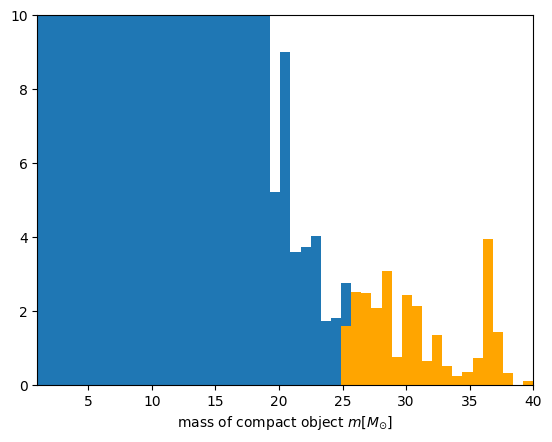

In [7]:
mask_massiveBHNS = (mass1 > 25)  
print(mass1)
print()
print(mass1[mask_massiveBHNS])

plt.hist(mass1, weights=weights, bins =np.linspace(1,40,50))
plt.hist(mass1[mask_massiveBHNS], weights=weights[mask_massiveBHNS], bins =np.linspace(1,40,50), color='orange')
# plt.hist(mass2, weights=weights, bins =100)
plt.xlabel(r'mass of compact object $m [M_{\odot}]$')
plt.ylim(0,10)
plt.xlim(1,40)
plt.show()

[ 3.93168 13.4491   2.20032 ...  4.06103  4.023    3.73859]

[31.4423 26.3835 26.4491 28.9154 31.3155 30.8416 31.6823 27.5023 34.0008
 36.3193 26.2425 36.9272 36.2825 25.2481 29.334  27.0376 28.4384 25.9026
 25.202  27.1978 27.4471 29.7412 35.538  30.8256 27.1162 33.9881 26.5984
 37.3449 27.9851 26.5063 27.9236 30.2821 25.218  33.0383 25.6897 25.0443
 31.2296 25.6647 37.1002 25.9603 32.0962 26.9813 29.703  37.1731 27.2272
 27.9357 36.4441 25.7    28.8008 25.2969 27.7228 39.2121 27.2038 25.347
 30.268  31.4178 32.4385 28.9124 38.3715 36.2313 27.6647 27.9029 26.873
 26.492  26.253  26.2733 28.0342 25.8912 28.1122 25.7771 26.8497 25.6974
 25.3844 34.9943 26.4007 32.2907 32.2707 29.9929 27.7705]


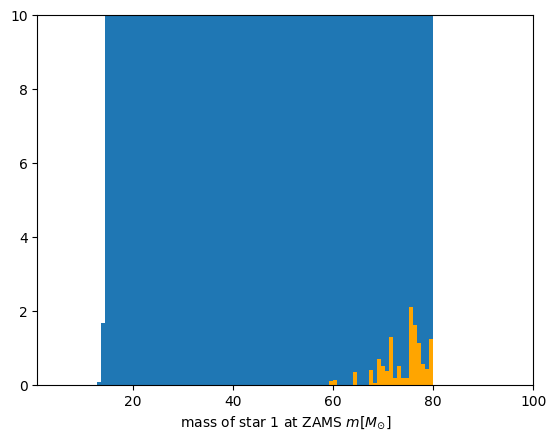

In [8]:
mask_massiveBHNS = (mass1 > 25)  
print(mass1)
print()
print(mass1[mask_massiveBHNS])

plt.hist(m1zams, weights=weights, bins =np.linspace(1,80,100))
plt.hist(m1zams[mask_massiveBHNS], weights=weights[mask_massiveBHNS], bins =np.linspace(1,80,100), color='orange')
# plt.hist(mass2, weights=weights, bins =100)
plt.xlabel(r'mass of star 1 at ZAMS $m [M_{\odot}]$')
plt.ylim(0,10)
plt.xlim(1,100)
plt.show()

(array([9.89720e+04, 1.02826e+05, 9.39820e+04, 1.21982e+05, 1.06671e+05,
        5.63920e+04, 1.35580e+05, 8.09110e+04, 9.48590e+04, 9.16980e+04,
        9.37530e+04, 0.00000e+00, 8.87820e+04, 9.17540e+04, 0.00000e+00,
        9.44220e+04, 8.83950e+04, 0.00000e+00, 3.41200e+04, 0.00000e+00,
        0.00000e+00, 2.08880e+04, 0.00000e+00, 1.38220e+04, 0.00000e+00,
        0.00000e+00, 6.73100e+03, 0.00000e+00, 0.00000e+00, 3.53200e+03,
        0.00000e+00, 0.00000e+00, 1.74300e+03, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 3.80000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.70000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00]),
 array([0.0001  , 0.000698, 0.001296, 0.001894, 0.002492, 0.00309 ,
        0.003688, 0.004286, 0.004884, 0.005482, 0.00608 , 0.006678,
        0.007276, 0.007874, 0.008472, 0.00907 , 0.009668, 0.010266,
        0.010864, 0.011462, 0.01206 , 0.012658, 0.013256, 0.0138

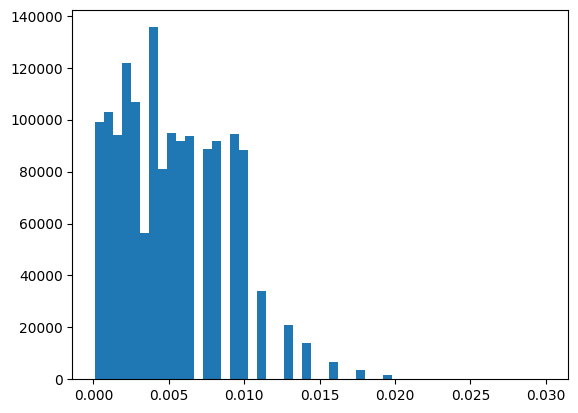

In [9]:
plt.hist(metallicitySystems, 50)

<div class="alert alert-block alert-warning">

    
## Example 1: plotting efficiencies for BHNS  
___
below we show an example of how to obtain and plot the efficiencies 



In [10]:


formation_efficiency = calculate_formation_efficiencies(path=path, metallicityGrid=metallicityGrid) 






In [11]:
print('The formation efficiencies in units of solar masses formed is:')
print(formation_efficiency, '[Msun^-1]' ) 
print()
print('the corresponding metallicities are:')
print(metallicityGrid)


The formation efficiencies in units of solar masses formed is:
[1.57133427e-06 2.00897514e-06 2.13276018e-06 2.14876631e-06
 2.17140990e-06 2.22201074e-06 2.13165985e-06 2.36348544e-06
 2.26968779e-06 2.67359515e-06 2.88949184e-06 3.24977224e-06
 3.38118798e-06 3.95335542e-06 4.35249435e-06 4.68638744e-06
 4.86026849e-06 5.01524452e-06 5.05309244e-06 5.29284207e-06
 4.82322215e-06 5.24642137e-06 6.70475457e-06 8.20844503e-06
 9.07500263e-06 9.87577253e-06 1.02607443e-05 1.09375616e-05
 1.13968083e-05 1.17237942e-05 1.19382597e-05 1.19688118e-05
 1.13593610e-05 1.07660479e-05 1.02440758e-05 9.73840300e-06
 9.59825123e-06 9.43046601e-06 9.02224433e-06 9.03766390e-06
 8.72642983e-06 7.78498486e-06 6.68925568e-06 4.91601137e-06
 3.90094466e-06 2.80120404e-06 1.92512491e-06 1.22951536e-06
 8.77808593e-07 4.74249447e-08 1.80861100e-08 3.94889492e-10
 1.09266431e-08] [Msun^-1]

the corresponding metallicities are:
[0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017, 0.00019, 0.00022, 0.00024

In [12]:
# lets plot it 

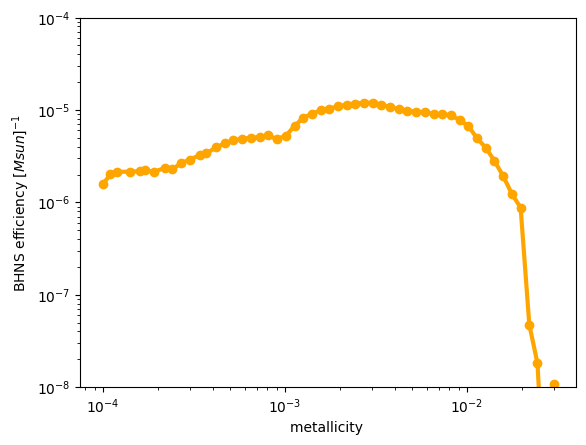

In [13]:

plt.plot(metallicityGrid, formation_efficiency,  lw=3, marker='o', color='orange')
plt.xlabel('metallicity ')
plt.ylabel('BHNS efficiency $[Msun]^{-1}$')
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-8, 1E-4)
plt.show()







<div class="alert alert-block alert-warning">

 
___
Tada! We got Figure 1


<div class="alert alert-block alert-info">

    

    
# Project Descriptions:



### Meera:
The above is for BHNS, and only shows the efficiencies for all BHNS formed. It would be really interesting to see instead these efficiencies for BBH systems. <br>
In addition, a big open question is how these efficiencies depend on the black hole *masses*. It would be great if you could investigate this
This will help answer some of the big open questions such as: how do LIGO's black holes form? Which black holes form from which stars? 


### Khushi:
The above is for BHNS, and only shows the efficiencies for all BHNS formed. It would be really interesting to see instead these efficiencies for BNS systems. <br>
In addition, a big open question is how these efficiencies depend on the binary neutron star *delay times*. It would be great if you could investigate this
This will help answer some of the big open questions such as: how do LIGOs binary neutron stars form? How can binary neutron stars enrich the Universe? Is more gold produced at early times compared to later in the Universe?
    

___


